In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\taileudaihoc\\do an\\drive-download-20230630T074917Z-001\\Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df['Total'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   Total             440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [6]:
list_=['Channel','Region']
for i in list_:
    print("Column "+ i + 'unique values: ')
    print(df[i].unique())
    print("\n")

Column Channelunique values: 
[2 1]


Column Regionunique values: 
[3 1 2]




In [7]:
df = df.drop(list_, axis = 1)
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,12669,9656,7561,214,2674,1338,34112
1,7057,9810,9568,1762,3293,1776,33266
2,6353,8808,7684,2405,3516,7844,36610
3,13265,1196,4221,6404,507,1788,27381
4,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,73302
436,39228,1431,764,4510,93,2346,48372
437,14531,15488,30243,437,14841,1867,77407
438,10290,1981,2232,1038,168,2125,17834


In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


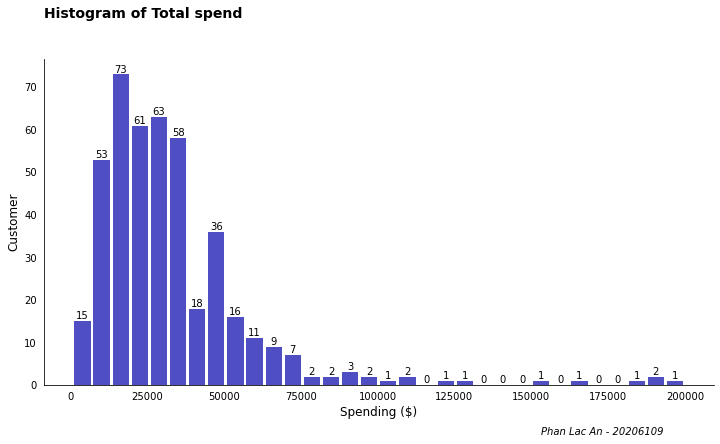

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = plt.hist(x=df['Total'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
# 
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             str(int(patches[i].get_height())), ha='center', va='bottom')
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

plt.suptitle('Histogram of Total spend', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)

plt.xlabel('Spending ($)', size=12)
plt.ylabel('Customer', size=12)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

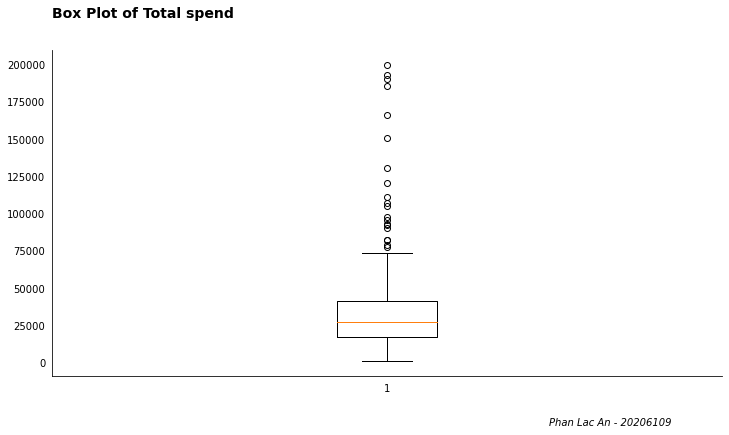

In [10]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ box plot
ax.boxplot(df['Total'])

# Vẽ dấu chấm số trên đỉnh của hộp box plot
for i, box in enumerate(ax.artists):
    ax.text(box.get_x() + box.get_width() / 2, df['Total'].iloc[i],
             str(int(df['Total'].iloc[i])), ha='center', va='bottom')

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Tắt dấu tích trên các trục
ax.tick_params(left=False, bottom=False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of Total spend', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

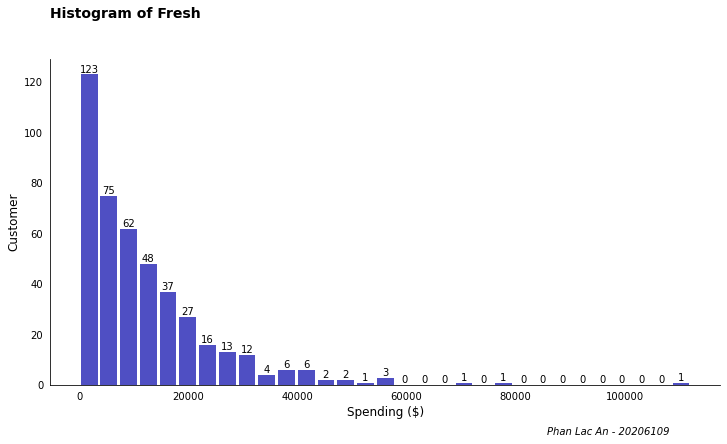

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = plt.hist(x=df['Fresh'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
# 
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             str(int(patches[i].get_height())), ha='center', va='bottom')
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

plt.suptitle('Histogram of Fresh', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)

plt.xlabel('Spending ($)', size=12)
plt.ylabel('Customer', size=12)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

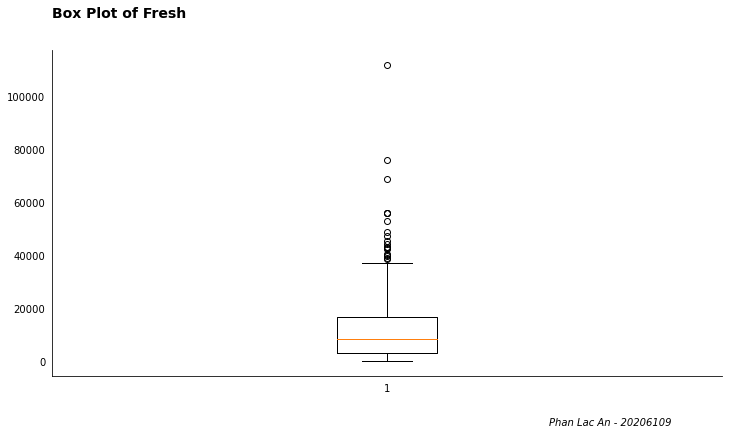

In [12]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ box plot
ax.boxplot(df['Fresh'])

# Vẽ dấu chấm số trên đỉnh của hộp box plot
for i, box in enumerate(ax.artists):
    ax.text(box.get_x() + box.get_width() / 2, df['Fresh'].iloc[i],
             str(int(df['Fresh'].iloc[i])), ha='center', va='bottom')

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Tắt dấu tích trên các trục
ax.tick_params(left=False, bottom=False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of Fresh', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

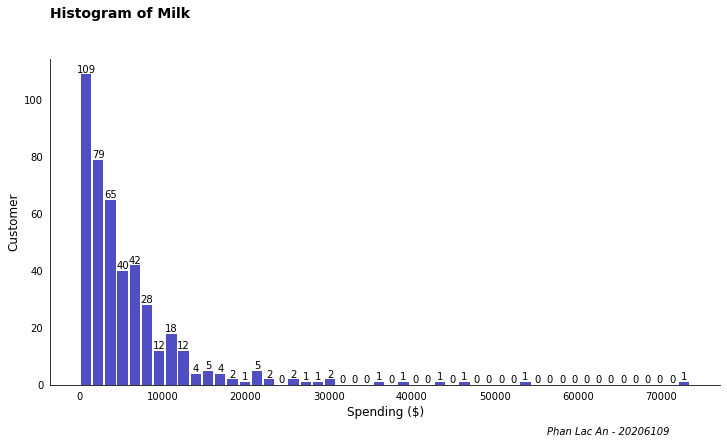

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = plt.hist(x=df['Milk'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
# 
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             str(int(patches[i].get_height())), ha='center', va='bottom')
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

plt.suptitle('Histogram of Milk', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Spending ($)', size=12)
plt.ylabel('Customer', size=12)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

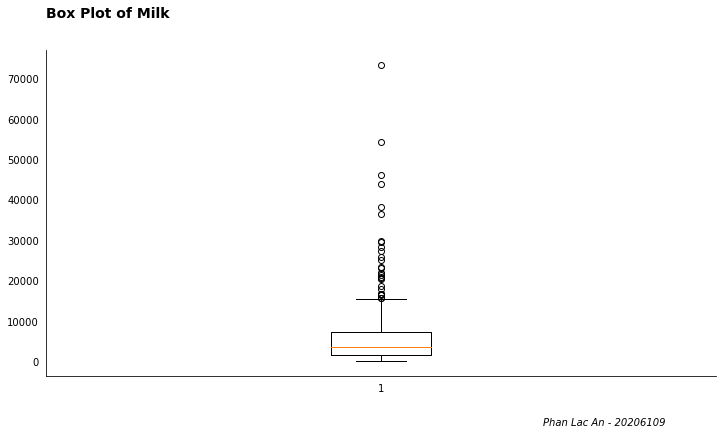

In [14]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ box plot
ax.boxplot(df['Milk'])

# Vẽ dấu chấm số trên đỉnh của hộp box plot
for i, box in enumerate(ax.artists):
    ax.text(box.get_x() + box.get_width() / 2, df['Milk'].iloc[i],
             str(int(df['Milk'].iloc[i])), ha='center', va='bottom')

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Tắt dấu tích trên các trục
ax.tick_params(left=False, bottom=False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of Milk', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

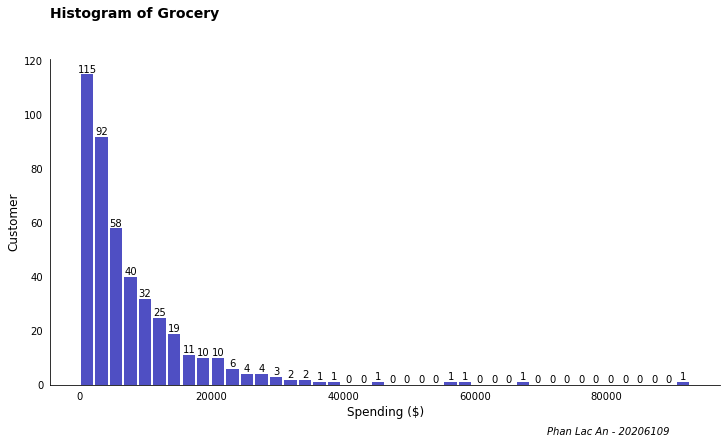

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = plt.hist(x=df['Grocery'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
# 
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             str(int(patches[i].get_height())), ha='center', va='bottom')
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

plt.suptitle('Histogram of Grocery', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Spending ($)', size=12)
plt.ylabel('Customer', size=12)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

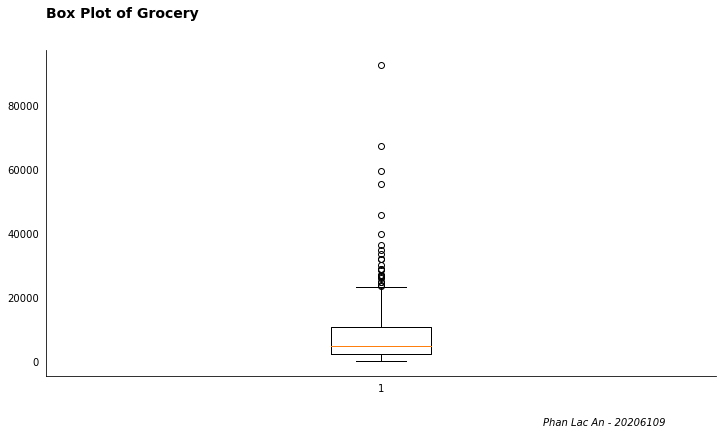

In [16]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ box plot
ax.boxplot(df['Grocery'])

# Vẽ dấu chấm số trên đỉnh của hộp box plot
for i, box in enumerate(ax.artists):
    ax.text(box.get_x() + box.get_width() / 2, df['Grocery'].iloc[i],
             str(int(df['Grocery'].iloc[i])), ha='center', va='bottom')

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Tắt dấu tích trên các trục
ax.tick_params(left=False, bottom=False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of Grocery', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

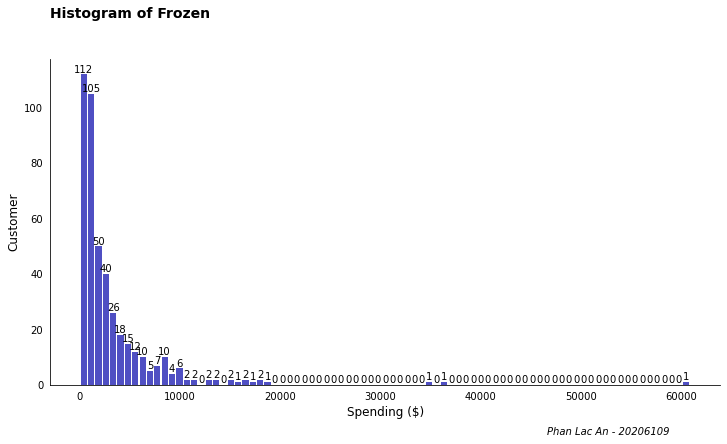

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

n, bins, patches = plt.hist(x=df['Frozen'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
# 
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             str(int(patches[i].get_height())), ha='center', va='bottom')
    
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False, bottom=False) 

plt.suptitle('Histogram of Frozen', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Spending ($)', size=12)
plt.ylabel('Customer', size=12)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

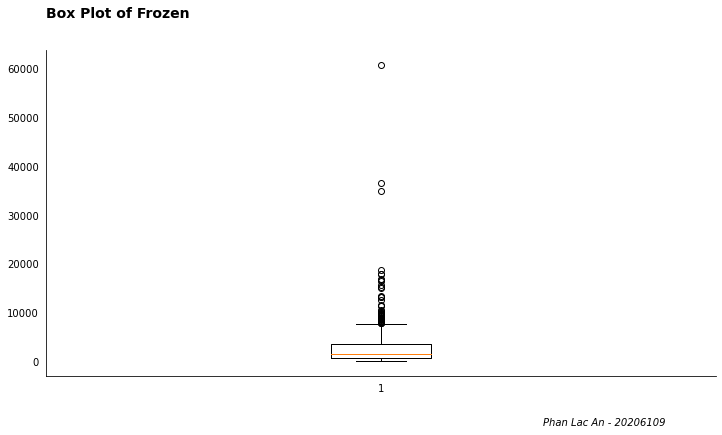

In [18]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Vẽ biểu đồ box plot
ax.boxplot(df['Frozen'])

# Vẽ dấu chấm số trên đỉnh của hộp box plot
for i, box in enumerate(ax.artists):
    ax.text(box.get_x() + box.get_width() / 2, df['Frozen'].iloc[i],
             str(int(df['Frozen'].iloc[i])), ha='center', va='bottom')

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Tắt dấu tích trên các trục
ax.tick_params(left=False, bottom=False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of Frozen', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic',transform=plt.gcf().transFigure)
plt.show()

Có thể thấy dữ liệu có tương đối nhiều outlier

In [19]:
def handle_outliers(dataframe, column_name):
    # Xác định giá trị cực tiểu và cực đại của Box plot
    q1 = dataframe[column_name].quantile(0.25)
    q3 = dataframe[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Clip các điểm ngoại lệ về giá trị cực tiểu và cực đại
    dataframe[column_name] = np.clip(dataframe[column_name], lower_bound, upper_bound)

    return dataframe

In [20]:
for column in df.columns:
    handle_outliers(df, column)

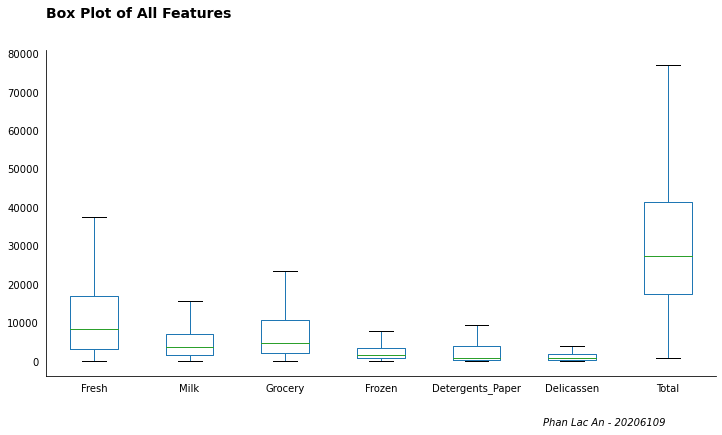

In [21]:
# Tạo hình ảnh và trục
fig, ax = plt.subplots(figsize=(12, 6))

# Tạo box plot cho toàn bộ các cột trong bộ dữ liệu
df.boxplot(ax=ax)

# Tắt đường viền phía trên và bên phải của biểu đồ
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Bỏ tích trên các trục
ax.tick_params(left=False, bottom=False)

# Bỏ grid lines
ax.grid(False)

# Thêm tiêu đề và nhãn cho biểu đồ
plt.suptitle('Box Plot of All Features', fontweight='bold', size=14, horizontalalignment='left', x=0.125)
plt.text(0.7, 0.01, "Phan Lac An - 20206109", style='italic', transform=plt.gcf().transFigure)

# Show biểu đồ
plt.show()

In [22]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [23]:
df = df.drop(['Total'], axis = 1)

In [24]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-1.236385e-17,6.560409e-18,-5.298792e-17,2.422305e-17,-6.207156e-17,4.592286e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-1.113200e+00,-1.139728e+00,-1.097790e+00,-1.031812e+00,-8.135002e-01,-1.168118e+00
25%,-8.068503e-01,-8.023920e-01,-7.714903e-01,-7.336488e-01,-7.271158e-01,-7.935246e-01
50%,-2.797635e-01,-3.244614e-01,-3.765158e-01,-4.078410e-01,-5.365594e-01,-2.784292e-01
75%,5.466882e-01,4.888079e-01,5.189495e-01,4.353100e-01,5.206500e-01,5.116612e-01
max,2.576996e+00,2.425608e+00,2.454609e+00,2.188748e+00,2.392299e+00,2.469440e+00


In [25]:
data_scaled

array([[ 0.12857261,  1.05158597,  0.04926747, -0.95324427,  0.09579175,
         0.06589216],
       [-0.42162716,  1.08673463,  0.35386453, -0.30973493,  0.30651872,
         0.47075856],
       [-0.49064723,  0.85804007,  0.06793486, -0.04243744,  0.38243489,
         2.46943983],
       ...,
       [ 0.31112285,  2.38267048,  2.45460914, -0.86054235,  2.39229863,
         0.55487464],
       [-0.10466425, -0.70014133, -0.7595007 , -0.61070442, -0.75732904,
         0.7933576 ],
       [-0.84025742, -0.76473271, -0.71730938, -1.01518413, -0.65213577,
        -1.1228252 ]])

In [26]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


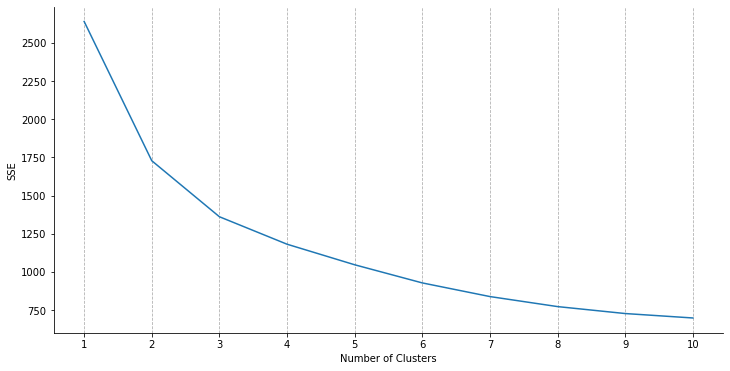

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 11), sse)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

kl.elbow

3

In [29]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

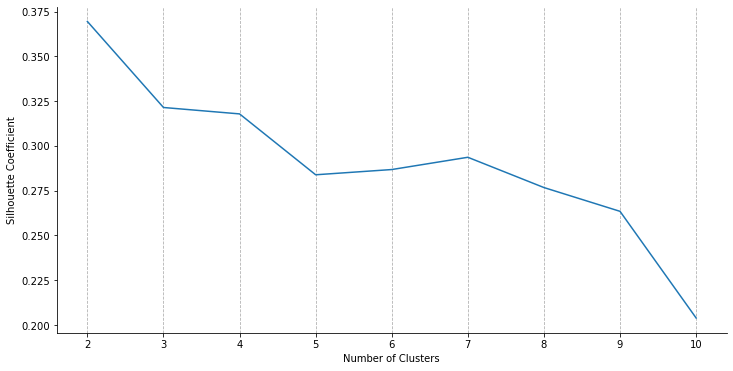

In [31]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(2, 11), silhouette_coefficients)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
    
ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(2, 11))

plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()